In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scrapbook as sb

In [47]:
notebooks = sb.read_notebooks("reports").notebooks

index = []
data = defaultdict(list)
for nb in notebooks:
    print(nb.parameters.keys())
    index.append(
        (
            nb.parameters["threads"],
            nb.parameters["batch_size"],
            nb.parameters["size"],
        )
    )
    data["fftw.average"].append(nb.scraps.data_dict["fftw.average"])
    data["fftw.stdev"].append(nb.scraps.data_dict["fftw.stdev"])
    data["mkl.average"].append(nb.scraps.data_dict["mkl.average"])
    data["mkl.stdev"].append(nb.scraps.data_dict["mkl.stdev"])

index = pd.MultiIndex.from_tuples(index, names=["threads", "batch_size", "size"])
df = pd.DataFrame(data, index=index)
df = df.sort_index()

df

dict_keys(['batch_size', 'size'])


KeyError: 'threads'

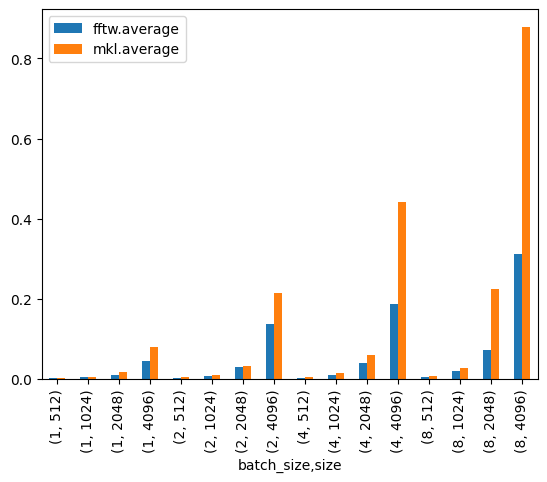

In [32]:
df[["fftw.average", "mkl.average"]].plot(kind="bar");